# Generate seasonal and interannual TC genesis
2025.1.21
Mu-Ting Chien

In [12]:
# Load pacakages
import numpy as np
from netCDF4 import Dataset
import xarray as xr
import os
import sys
sys.path.append('/barnes-engr-scratch1/mchien/Function/')
import mjo_mean_state_diagnostics_uw as MJO
#
sys.path.append('/home/C832572266/code/function/')
import KW_diagnostics_new as KW
import matplotlib.pyplot as plt
import cartopy.util as cartopy_util
import cartopy.crs as ccrs
from datetime import datetime, timezone
from matplotlib.patches import Rectangle

In [2]:
DIR               = '/barnes-engr-scratch1/c832572266/'
file_dir_multi_yr = DIR + 'data_output/ace2/ace2_output/10yr/'
file_dir_era5     = DIR + 'data_output/ERA5TC_muting/StichNodes/'
fig_dir           = DIR + 'figure/ace2_fig/TC/from_slp/1deg/'
os.makedirs(fig_dir, exist_ok=True)
expname           = list(['ace2','era5'])
nyr               = 10 # 2001-2010

In [3]:
# Load TC genesis data

# ACE2
data        = np.load(file_dir_multi_yr+'TC_genesis_10yr_ace2_from_slp.npz')
lon_TC_ace2 = data['lon_TC']
lat_TC_ace2 = data['lat_TC']
yr_ace2     = data['yr']
mon_ace2    = data['mon']
day_ace2    = data['day']

# ERA5
#data        = np.load(file_dir_multi_yr+'TC_genesis_era5_2001-2010.npz')
data        = np.load(file_dir_era5+'TC_genesis_era5_2001-2010_1deg.npz')
lon_TC_era5 = data['lon_TC']
lat_TC_era5 = data['lat_TC']
yr_era5     = data['yr']
mon_era5    = data['mon']
day_era5    = data['day']

# Only select TC genesis within 30S-30N

In [4]:
# ACE2
lon_TC_ace2_30SN = np.where(np.abs(lat_TC_ace2)>30, np.nan, lon_TC_ace2)
lat_TC_ace2_30SN = np.where(np.abs(lat_TC_ace2)>30, np.nan, lat_TC_ace2)
yr_ace2_30SN     = np.where(np.abs(lat_TC_ace2)>30, np.nan, yr_ace2)
mon_ace2_30SN    = np.where(np.abs(lat_TC_ace2)>30, np.nan, mon_ace2)
day_ace2_30SN    = np.where(np.abs(lat_TC_ace2)>30, np.nan, day_ace2)

lon_TC_ace2_30SN = lon_TC_ace2_30SN[~np.isnan(lon_TC_ace2_30SN)]
lat_TC_ace2_30SN = lat_TC_ace2_30SN[~np.isnan(lat_TC_ace2_30SN)]
yr_ace2_30SN     = yr_ace2_30SN[~np.isnan(yr_ace2_30SN)]
mon_ace2_30SN    = mon_ace2_30SN[~np.isnan(mon_ace2_30SN)]
day_ace2_30SN    = day_ace2_30SN[~np.isnan(day_ace2_30SN)]

nTC_ace2 = np.size(lat_TC_ace2_30SN)
if np.size(lon_TC_ace2_30SN)!=nTC_ace2 or np.size(yr_ace2_30SN)!=nTC_ace2 or np.size(mon_ace2_30SN)!=nTC_ace2 or\
    np.size(day_ace2_30SN)!=nTC_ace2:
    print('Size mismatch')
else:
    print('Number of TC genesis in ACE2 (30S-30N):', nTC_ace2)



Number of TC genesis in ACE2 (30S-30N): 508


In [5]:
# ERA5
lon_TC_era5_30SN = np.where(np.abs(lat_TC_era5)>30, np.nan, lon_TC_era5)
lat_TC_era5_30SN = np.where(np.abs(lat_TC_era5)>30, np.nan, lat_TC_era5)
yr_era5_30SN     = np.where(np.abs(lat_TC_era5)>30, np.nan, yr_era5)
mon_era5_30SN    = np.where(np.abs(lat_TC_era5)>30, np.nan, mon_era5)
day_era5_30SN    = np.where(np.abs(lat_TC_era5)>30, np.nan, day_era5)

lon_TC_era5_30SN = lon_TC_era5_30SN[~np.isnan(lon_TC_era5_30SN)]
lat_TC_era5_30SN = lat_TC_era5_30SN[~np.isnan(lat_TC_era5_30SN)]
yr_era5_30SN     = yr_era5_30SN[~np.isnan(yr_era5_30SN)]
mon_era5_30SN    = mon_era5_30SN[~np.isnan(mon_era5_30SN)]
day_era5_30SN    = day_era5_30SN[~np.isnan(day_era5_30SN)]

nTC_era5 = np.size(lat_TC_era5_30SN)
if np.size(lon_TC_era5_30SN)!=nTC_era5 or np.size(yr_era5_30SN)!=nTC_era5 or np.size(mon_era5_30SN)!=nTC_era5 or\
    np.size(day_era5_30SN)!=nTC_era5:
    print('Size mismatch')
else:
    print('Number of TC genesis in era5 (30S-30N):', nTC_era5)

Number of TC genesis in era5 (30S-30N): 559


# Plot TC genesis map

In [6]:
# Load normal lon and lat 
file = DIR + 'data_output/ace_forcing/HGTsfc.nc'
data = xr.open_dataset(file)
lon = data['lon']
lat = data['lat']

In [7]:
lon_adj = np.where(lon>180, -360+lon, lon)

In [20]:
# Define basin
basin_list    = list(['NI','NWPAC','NEPAC','NATL','SI','SPAC'])
basin_long_list = list(['North IO','North WestPac','North EastPac','North Atl','South IO','South Pac'])
basin_lon_min = np.array([45, 105, 180, 265, 35, 135])
basin_lon_max = np.array([105, 180, 265, 357.5, 135, 270])
latmax = 30 #25 is not used, use 30
basin_lat_min = np.array([0,    0,    0,  0,  -latmax, -latmax])
basin_lat_max = np.array([latmax,  latmax, latmax, latmax,    0, 0])
nbasin        = np.size(basin_list)

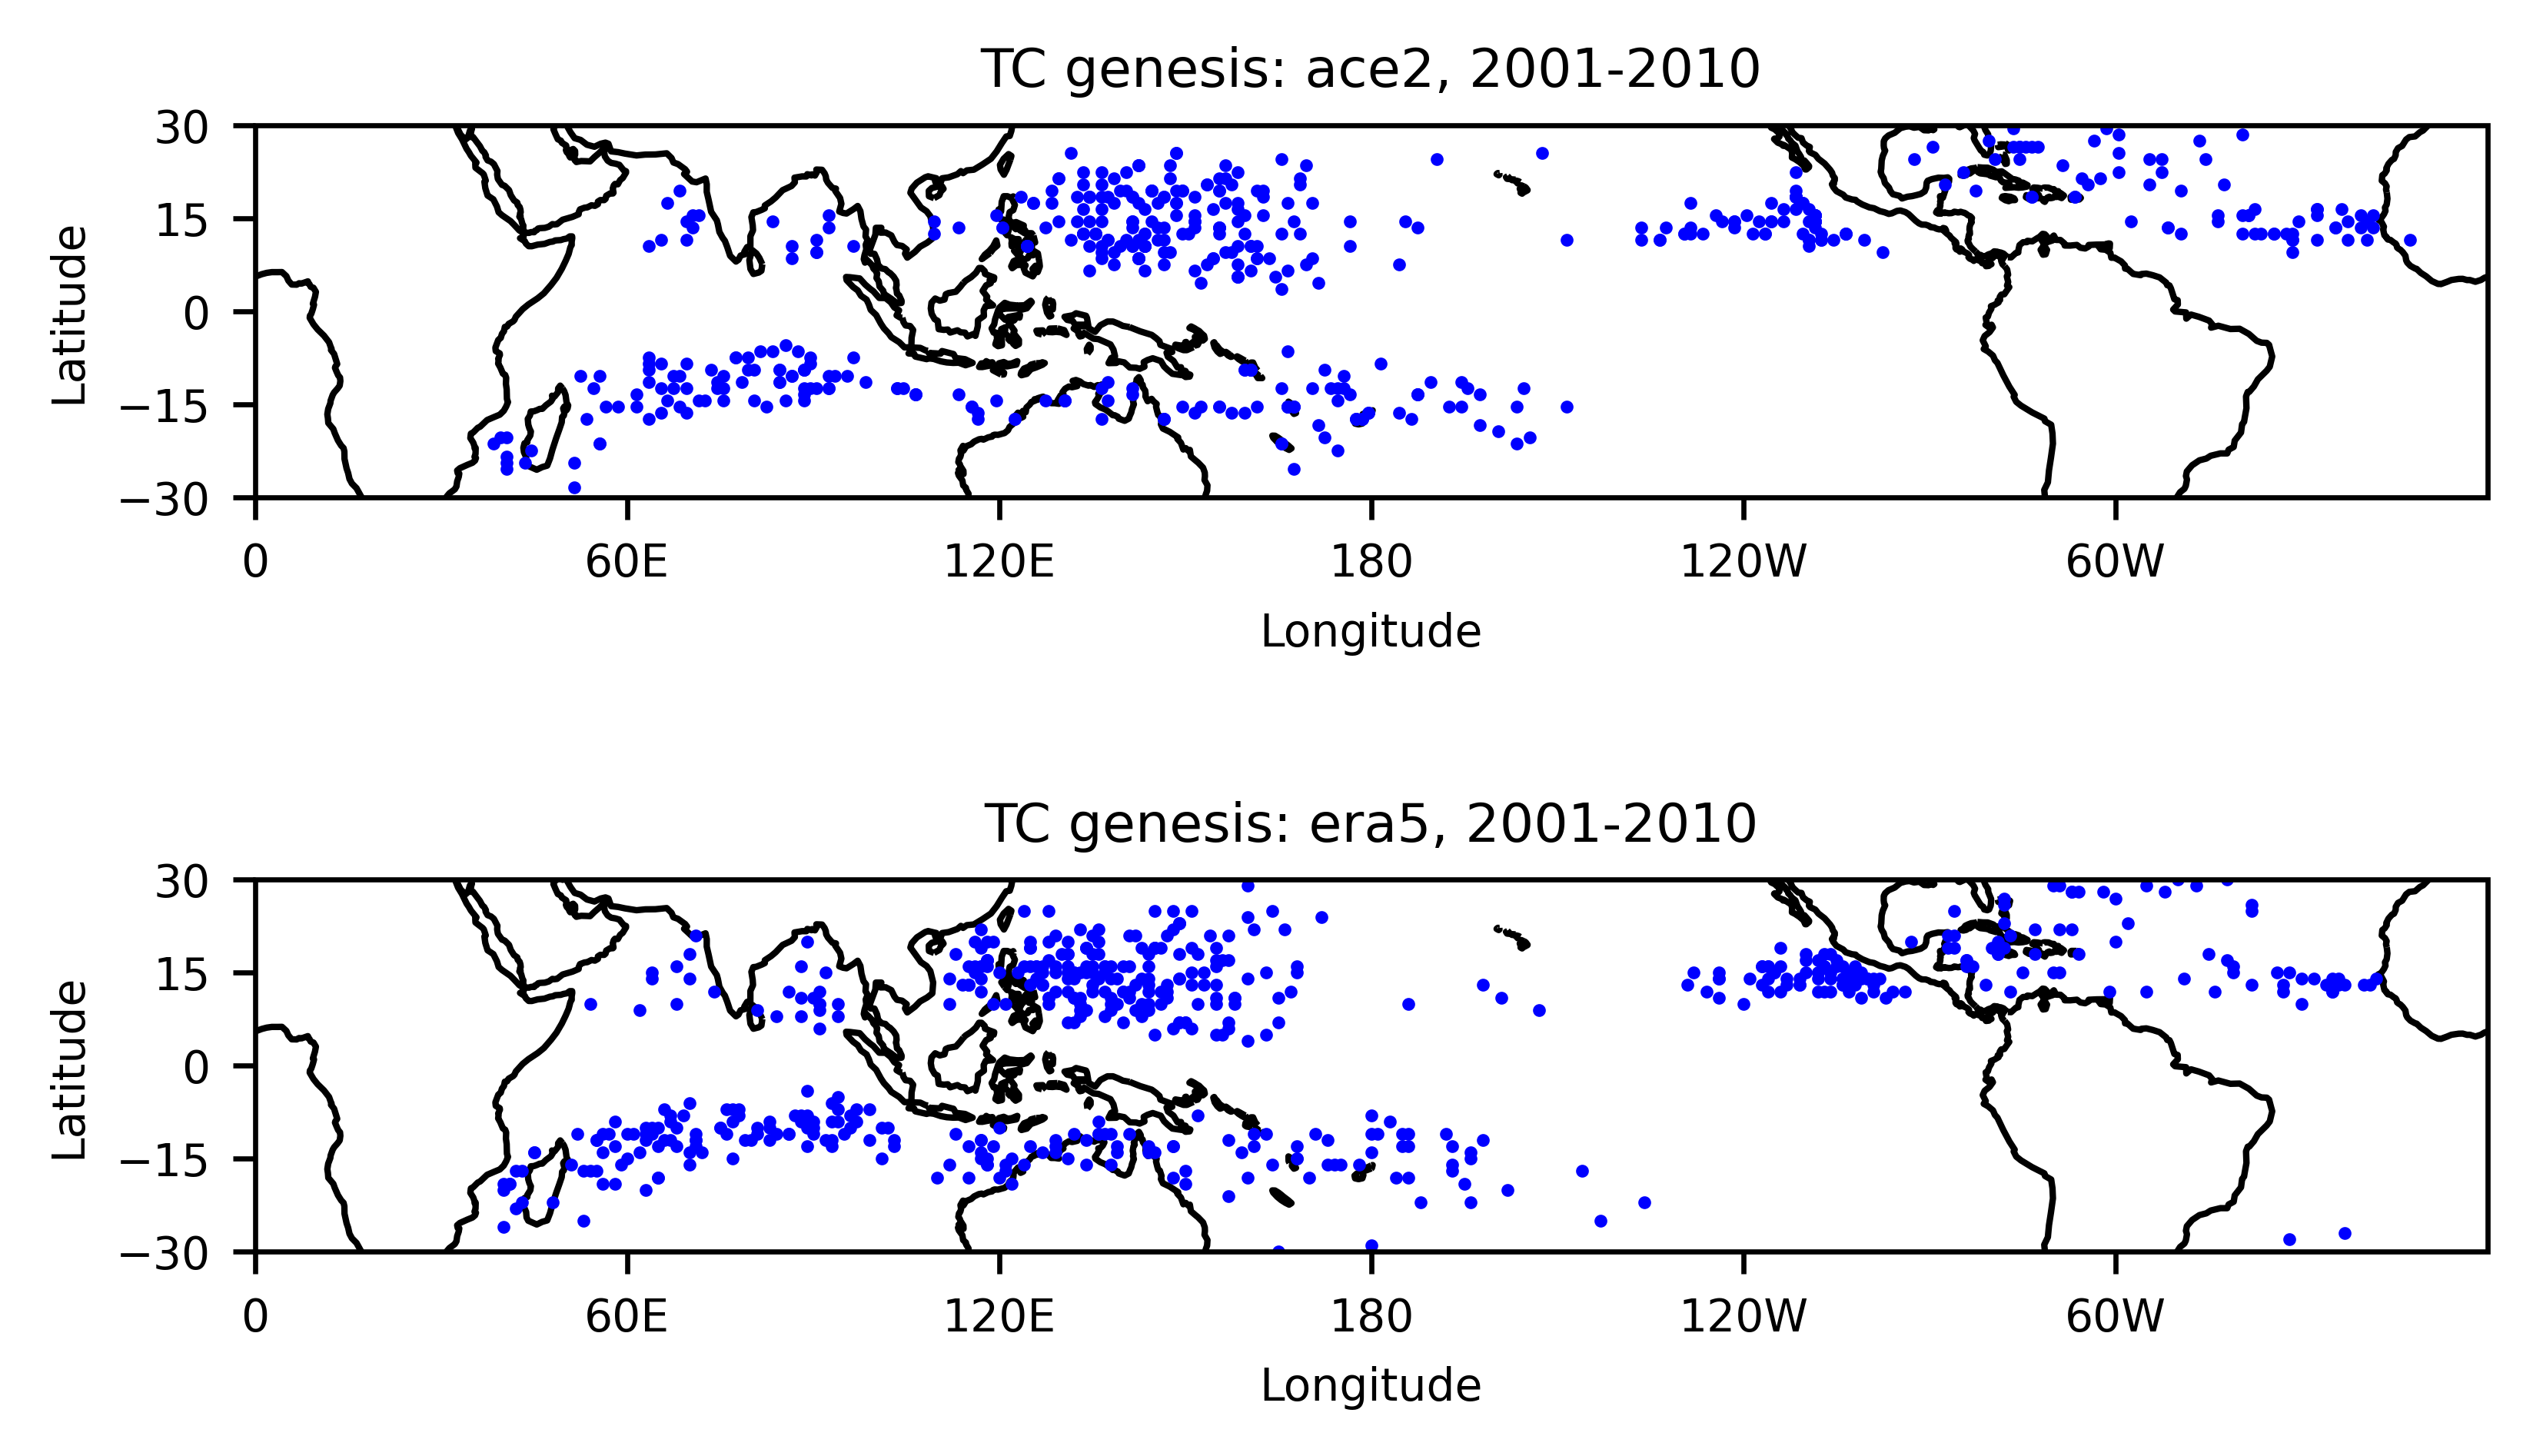

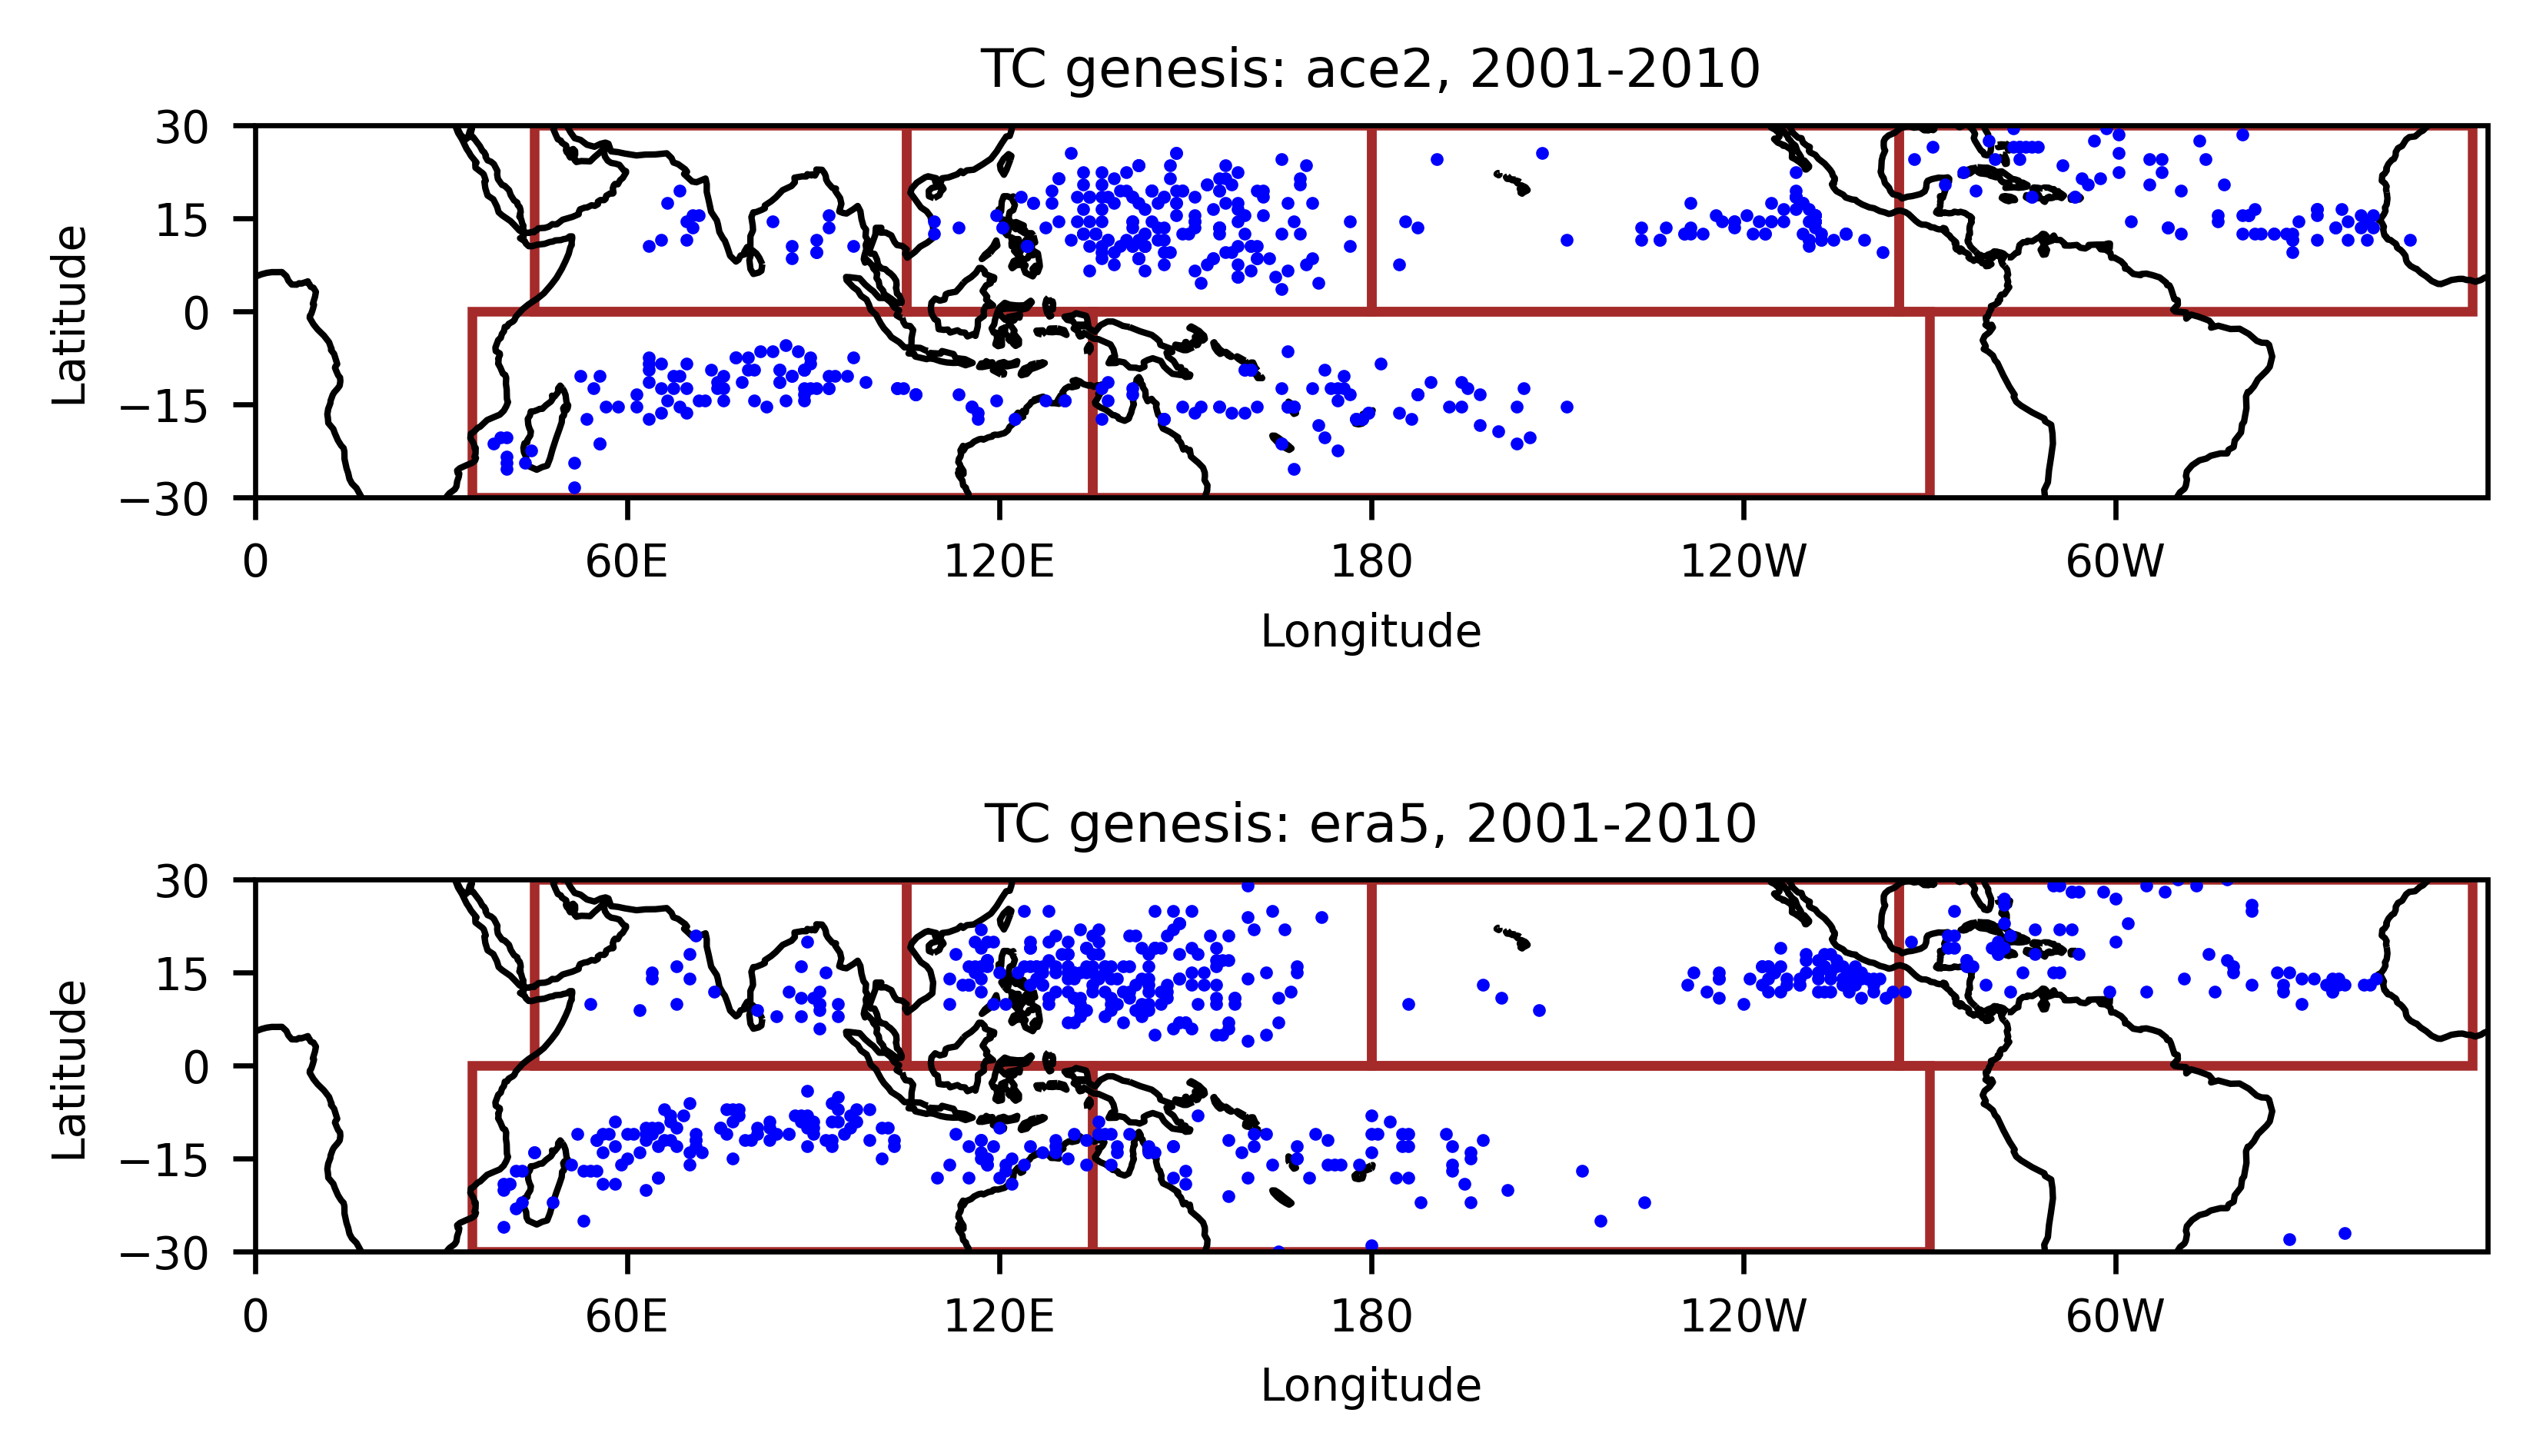

In [21]:
# Plot TC genesis map
for plot_basin in range(0, 2):
    if plot_basin == 0:
        fig_name = 'Fig.0_TCgenesis_map_180.png'
    else:
        fig_name = 'Fig.0_TCgenesis_map_180_with_basin.png'
    fig, axes = plt.subplots(2,1,figsize=(5.5, 4),dpi=600, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)} )
    #fig, axes = plt.subplots(2,1,figsize=(5.5, 4),dpi=600, subplot_kw={'projection':ccrs.PlateCarree()} )
    plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.2, wspace=0.1)
    plt.rcParams.update({'font.size': 7})

    for iexp in range(0,2):

        lon_TC = globals()['lon_TC_'+expname[iexp]+'_30SN']
        lat_TC = globals()['lat_TC_'+expname[iexp]+'_30SN']
        lon_TC_adj = np.where(lon_TC>180, -360+lon_TC, lon_TC)
        lon_TC_adj2 = np.where(lon_TC_adj>=0, lon_TC_adj-180, lon_TC_adj)
        lon_TC_adj3 = np.where(lon_TC_adj<0, lon_TC_adj+180, lon_TC_adj2)

        plt.subplot(2,1, iexp+1)
        ax = plt.gca()
        ax.coastlines()
        #ax.set_xticks(np.arange(0,360,60), crs=ccrs.PlateCarree(central_longitude=180))
        ax.set_xticks(np.arange(-180,180,60), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(-30,45,15), crs=ccrs.PlateCarree())
        ax.set_xticklabels(['180', '120W', '60W','0', '60E', '120E'])
        #ax.set_xticks(np.arange(-180,240,60), crs=ccrs.PlateCarree())

        #plt.plot(lon_TC_adj, lat_TC, 'bo', markersize=1)
        ax.plot(lon_TC_adj3, lat_TC, 'bo', markersize=1)

        # Plot basins
        if plot_basin == 1:
            for i in range(0, np.size(basin_list)):
                width = basin_lon_max[i] - basin_lon_min[i]
                height = basin_lat_max[i] - basin_lat_min[i]
                rect = Rectangle((basin_lon_min[i], basin_lat_min[i]), width, height,
                                edgecolor='brown', facecolor='none', linewidth=1.5, transform=ccrs.PlateCarree())
                ax.add_patch(rect)
        plt.title('TC genesis: '+expname[iexp]+', 2001-2010')#+yrname)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.ylim([-30, 30])
        plt.xlim([-180, 180])

    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()

# Separate the data into each basin


In [22]:
# Assign basin index to each data: ace2, era5
# product: basin_id_ace2 & basin_id_era5
for iexp in range(0, 2):

    lon_TC   = globals()['lon_TC_'+expname[iexp]+'_30SN']
    lat_TC   = globals()['lat_TC_'+expname[iexp]+'_30SN']
    if iexp == 0:
        basin_id_ace2 = np.zeros([np.size(lon_TC)])
        basin_id_ace2[:] = np.nan
    else:
        basin_id_era5 = np.zeros([np.size(lon_TC)])
        basin_id_era5[:] = np.nan

    for i in range(0, np.size(lon_TC)):
        for ibasin in range(0, nbasin):
            #print(i, ibasin)
            if ( (lon_TC[i]-basin_lon_min[ibasin])*(basin_lon_max[ibasin]-lon_TC[i]) >= 0 ) and \
                ( (lat_TC[i]-basin_lat_min[ibasin])*(basin_lat_max[ibasin]-lat_TC[i]) >= 0 ):
                if iexp == 0:
                    basin_id_ace2[i] = ibasin
                elif iexp == 1:
                    basin_id_era5[i] = ibasin
                #print(ibasin)
                break

# Count number of TC genesis for each basin for each year

In [23]:
# Count number of TC genesis for each basin for each year
TC_genesis_yr_basin_ace2 = np.zeros([nyr, nbasin])
TC_genesis_yr_basin_era5 = np.zeros([nyr, nbasin])

for iexp in range(0, 2):
    yr_TC = globals()['yr_'+expname[iexp]+'_30SN']
    basin_id = globals()['basin_id_'+expname[iexp]]
    
    for i in range(0, np.size(yr_TC)):
        if np.isnan(basin_id[i]) != 1:
            iyr     = int(yr_TC[i]-2001)
            ibasin  = int(basin_id[i])
            if iexp == 0:
                TC_genesis_yr_basin_ace2[ iyr, ibasin ] = TC_genesis_yr_basin_ace2[ iyr, ibasin ] + 1
            else:
                TC_genesis_yr_basin_era5[ iyr, ibasin ] = TC_genesis_yr_basin_era5[ iyr, ibasin ] + 1

yr = np.arange(2001, 2011)


In [24]:
# Save data
np.savez(file_dir_multi_yr + 'TC_genesis_number_yr_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz', 
         TC_genesis_yr_basin_ace2 = TC_genesis_yr_basin_ace2,\
        TC_genesis_yr_basin_era5 = TC_genesis_yr_basin_era5,\
        basin_list = basin_list, basin_long_list=basin_long_list,\
        basin_lon_min = basin_lon_min, basin_lon_max = basin_lon_max, \
        basin_lat_min = basin_lat_min, basin_lat_max = basin_lat_max,\
        yr = yr )

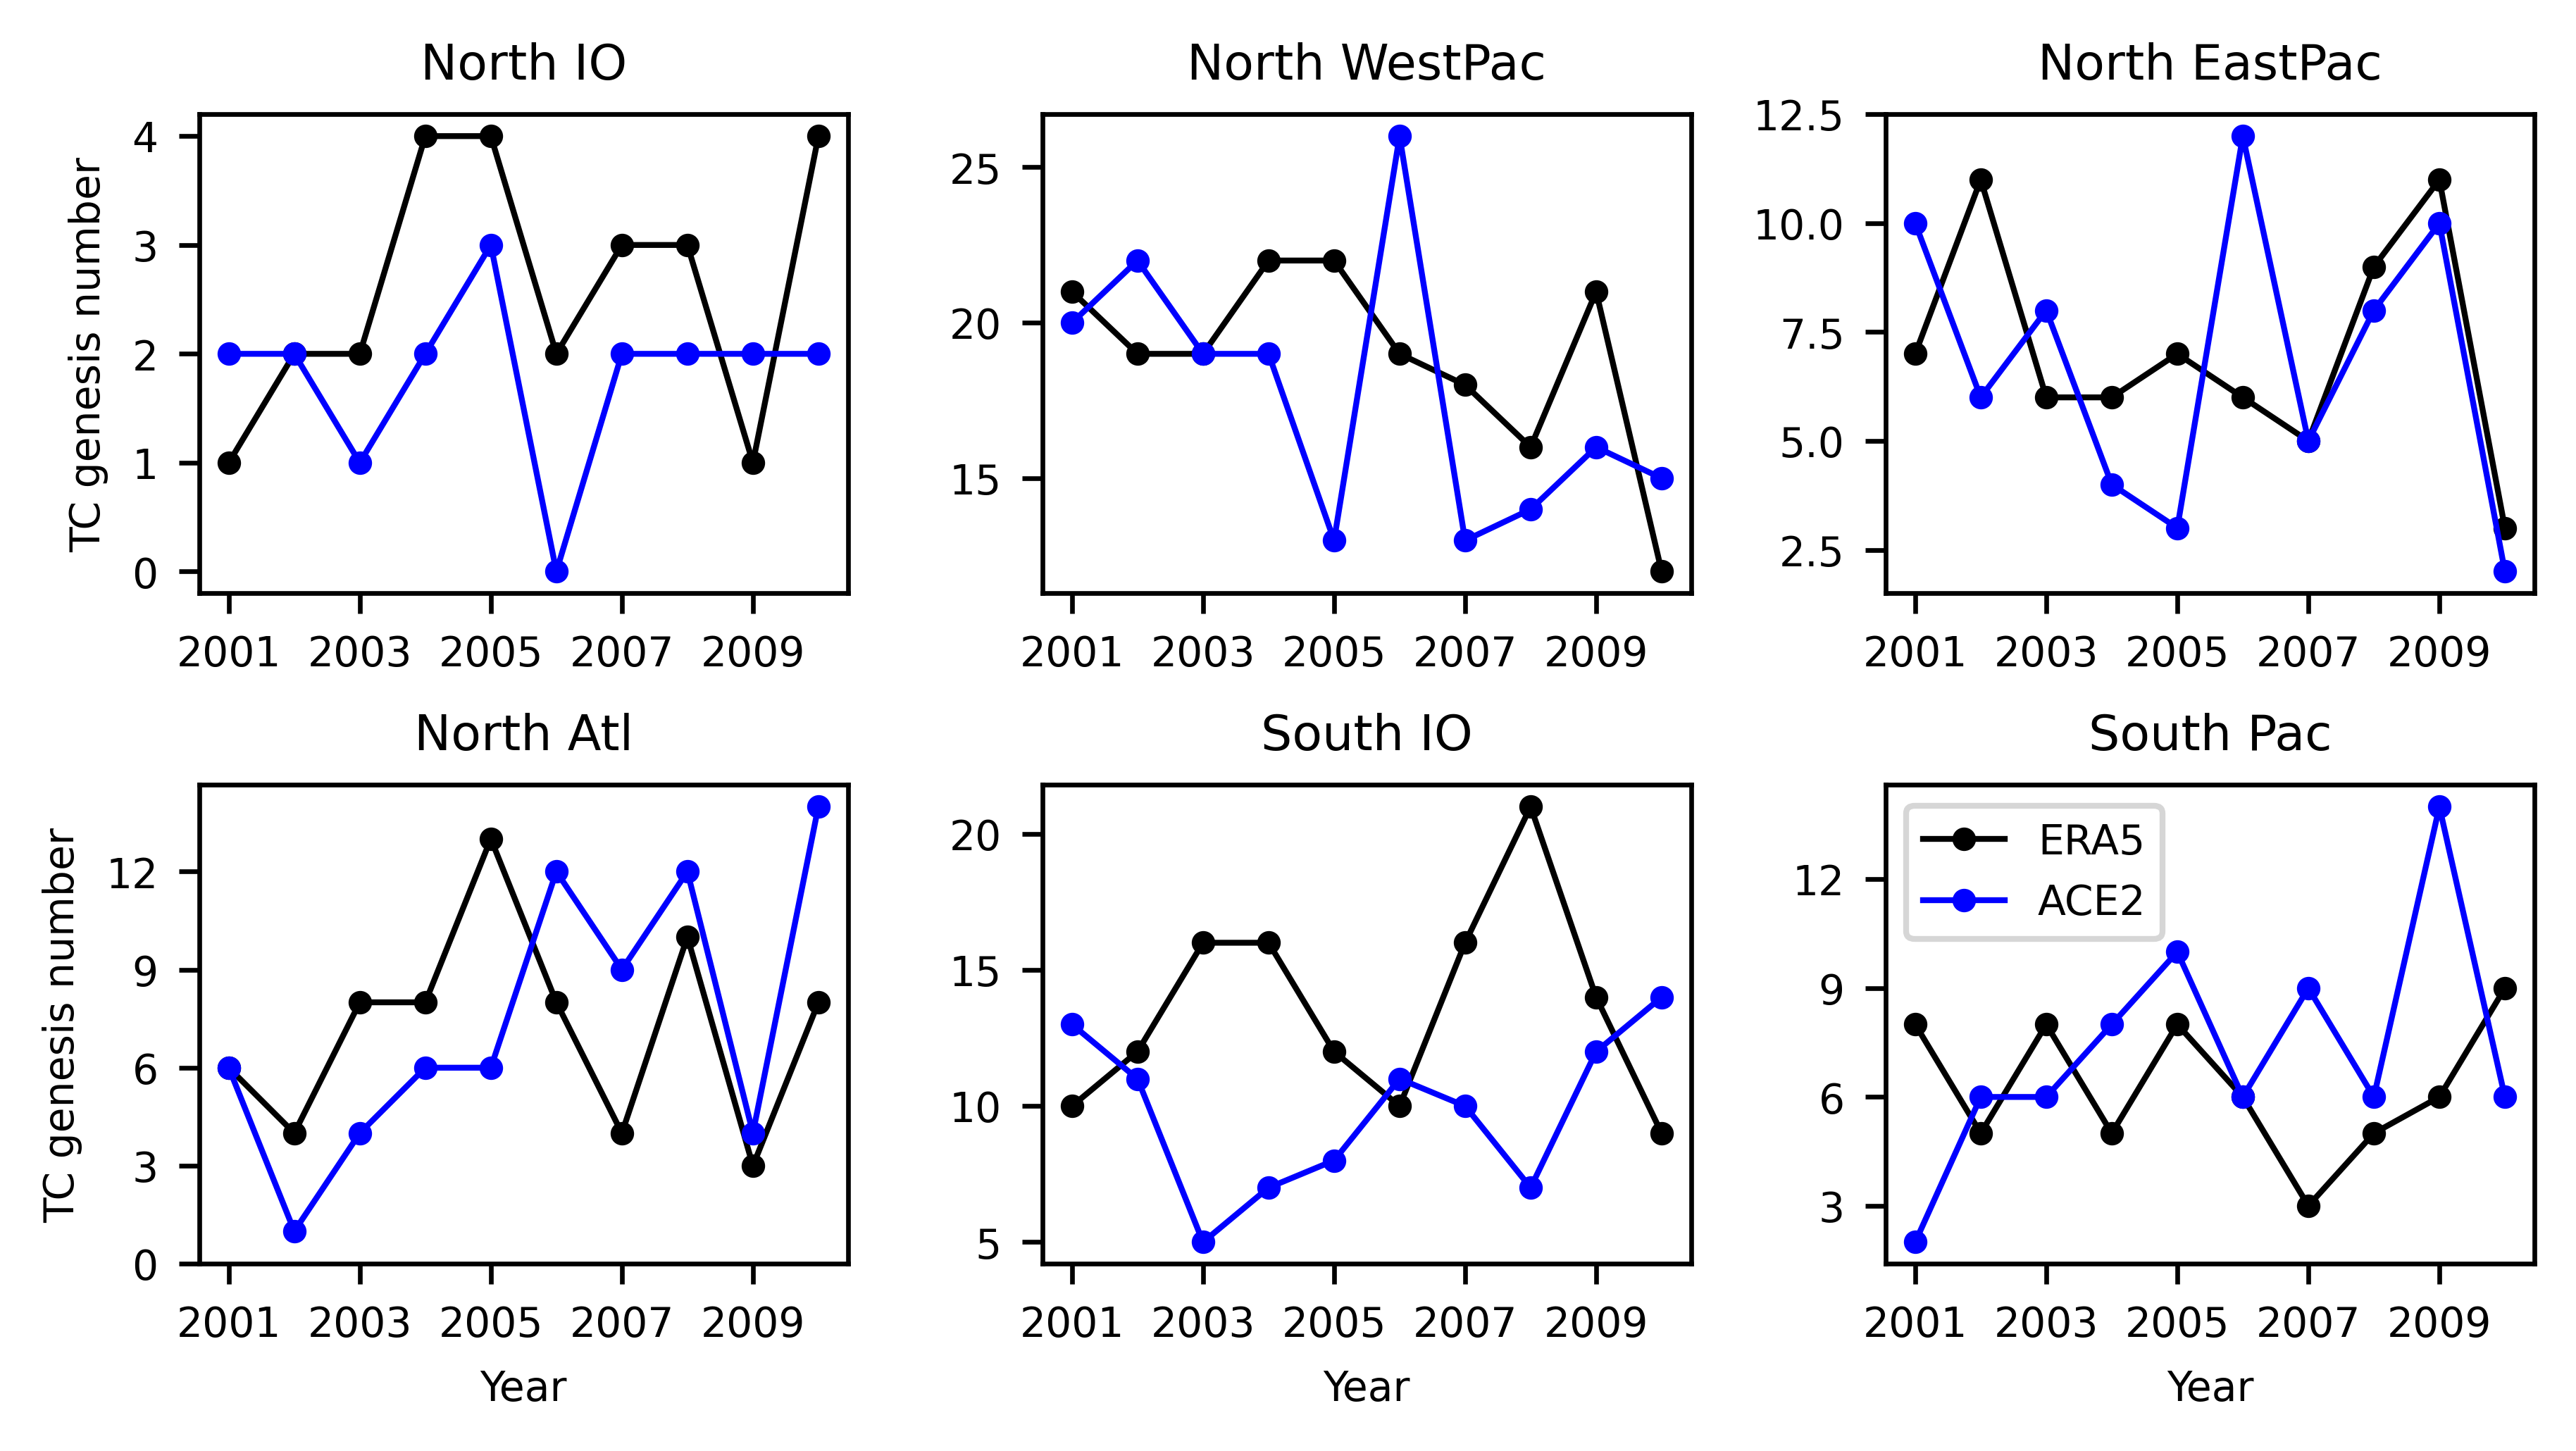

In [25]:
# Plot TC genesis number per year for each basin
yr_xtick = np.arange(2001, 2011, 2)

fig_name = 'Fig.1.TC_genesis_year_basin.png'
fig = plt.subplots(2,3,figsize=(6.5, 4),dpi=600)
plt.rcParams.update({'font.size': 7})
plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.4)

for ibasin in range(0, nbasin):
    plt.subplot(2, 3, ibasin+1)
    plt.plot(yr, TC_genesis_yr_basin_era5[:, ibasin], 'k-o', linewidth=1, markersize=3)
    plt.plot(yr, TC_genesis_yr_basin_ace2[:, ibasin], 'b-o', linewidth=1, markersize=3)
    plt.title(basin_long_list[ibasin])
    plt.xticks(yr_xtick)

    if ibasin == 3:
        plt.yticks(np.arange(0, 15, 3))
    elif ibasin == 5:
        plt.yticks(np.arange(3, 15, 3))
    
    if ibasin == 0 or ibasin == 3:
        plt.ylabel('TC genesis number')
    
    if ibasin > 2:
        plt.xlabel('Year')

plt.legend(['ERA5','ACE2'])
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()

# Count the averaged TC genesis number for each month for each basin

In [26]:
# Count number of TC genesis for each basin for each month
TC_genesis_mon_basin_ace2 = np.zeros([12, nbasin])
TC_genesis_mon_basin_era5 = np.zeros([12, nbasin])

for iexp in range(0, 2):
    mon_TC = globals()['mon_'+expname[iexp]+'_30SN']
    basin_id = globals()['basin_id_'+expname[iexp]]
    
    for i in range(0, np.size(mon_TC)):
        if np.isnan(basin_id[i]) != 1:
            imon     = int(mon_TC[i]-1)
            ibasin  = int(basin_id[i])
            if iexp == 0:
                TC_genesis_mon_basin_ace2[ imon, ibasin ] = TC_genesis_mon_basin_ace2[ imon, ibasin ] + 1
            else:
                TC_genesis_mon_basin_era5[ imon, ibasin ] = TC_genesis_mon_basin_era5[ imon, ibasin ] + 1

mon = np.arange(1, 13)

In [27]:
# Save data
np.savez(file_dir_multi_yr + 'TC_genesis_number_per_month_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz', 
         TC_genesis_mon_basin_ace2 = TC_genesis_mon_basin_ace2/nyr,\
        TC_genesis_mon_basin_era5 = TC_genesis_mon_basin_era5/nyr,\
        basin_list = basin_list, basin_long_list=basin_long_list,\
        basin_lon_min = basin_lon_min, basin_lon_max = basin_lon_max, \
        basin_lat_min = basin_lat_min, basin_lat_max = basin_lat_max,\
        mon = mon )

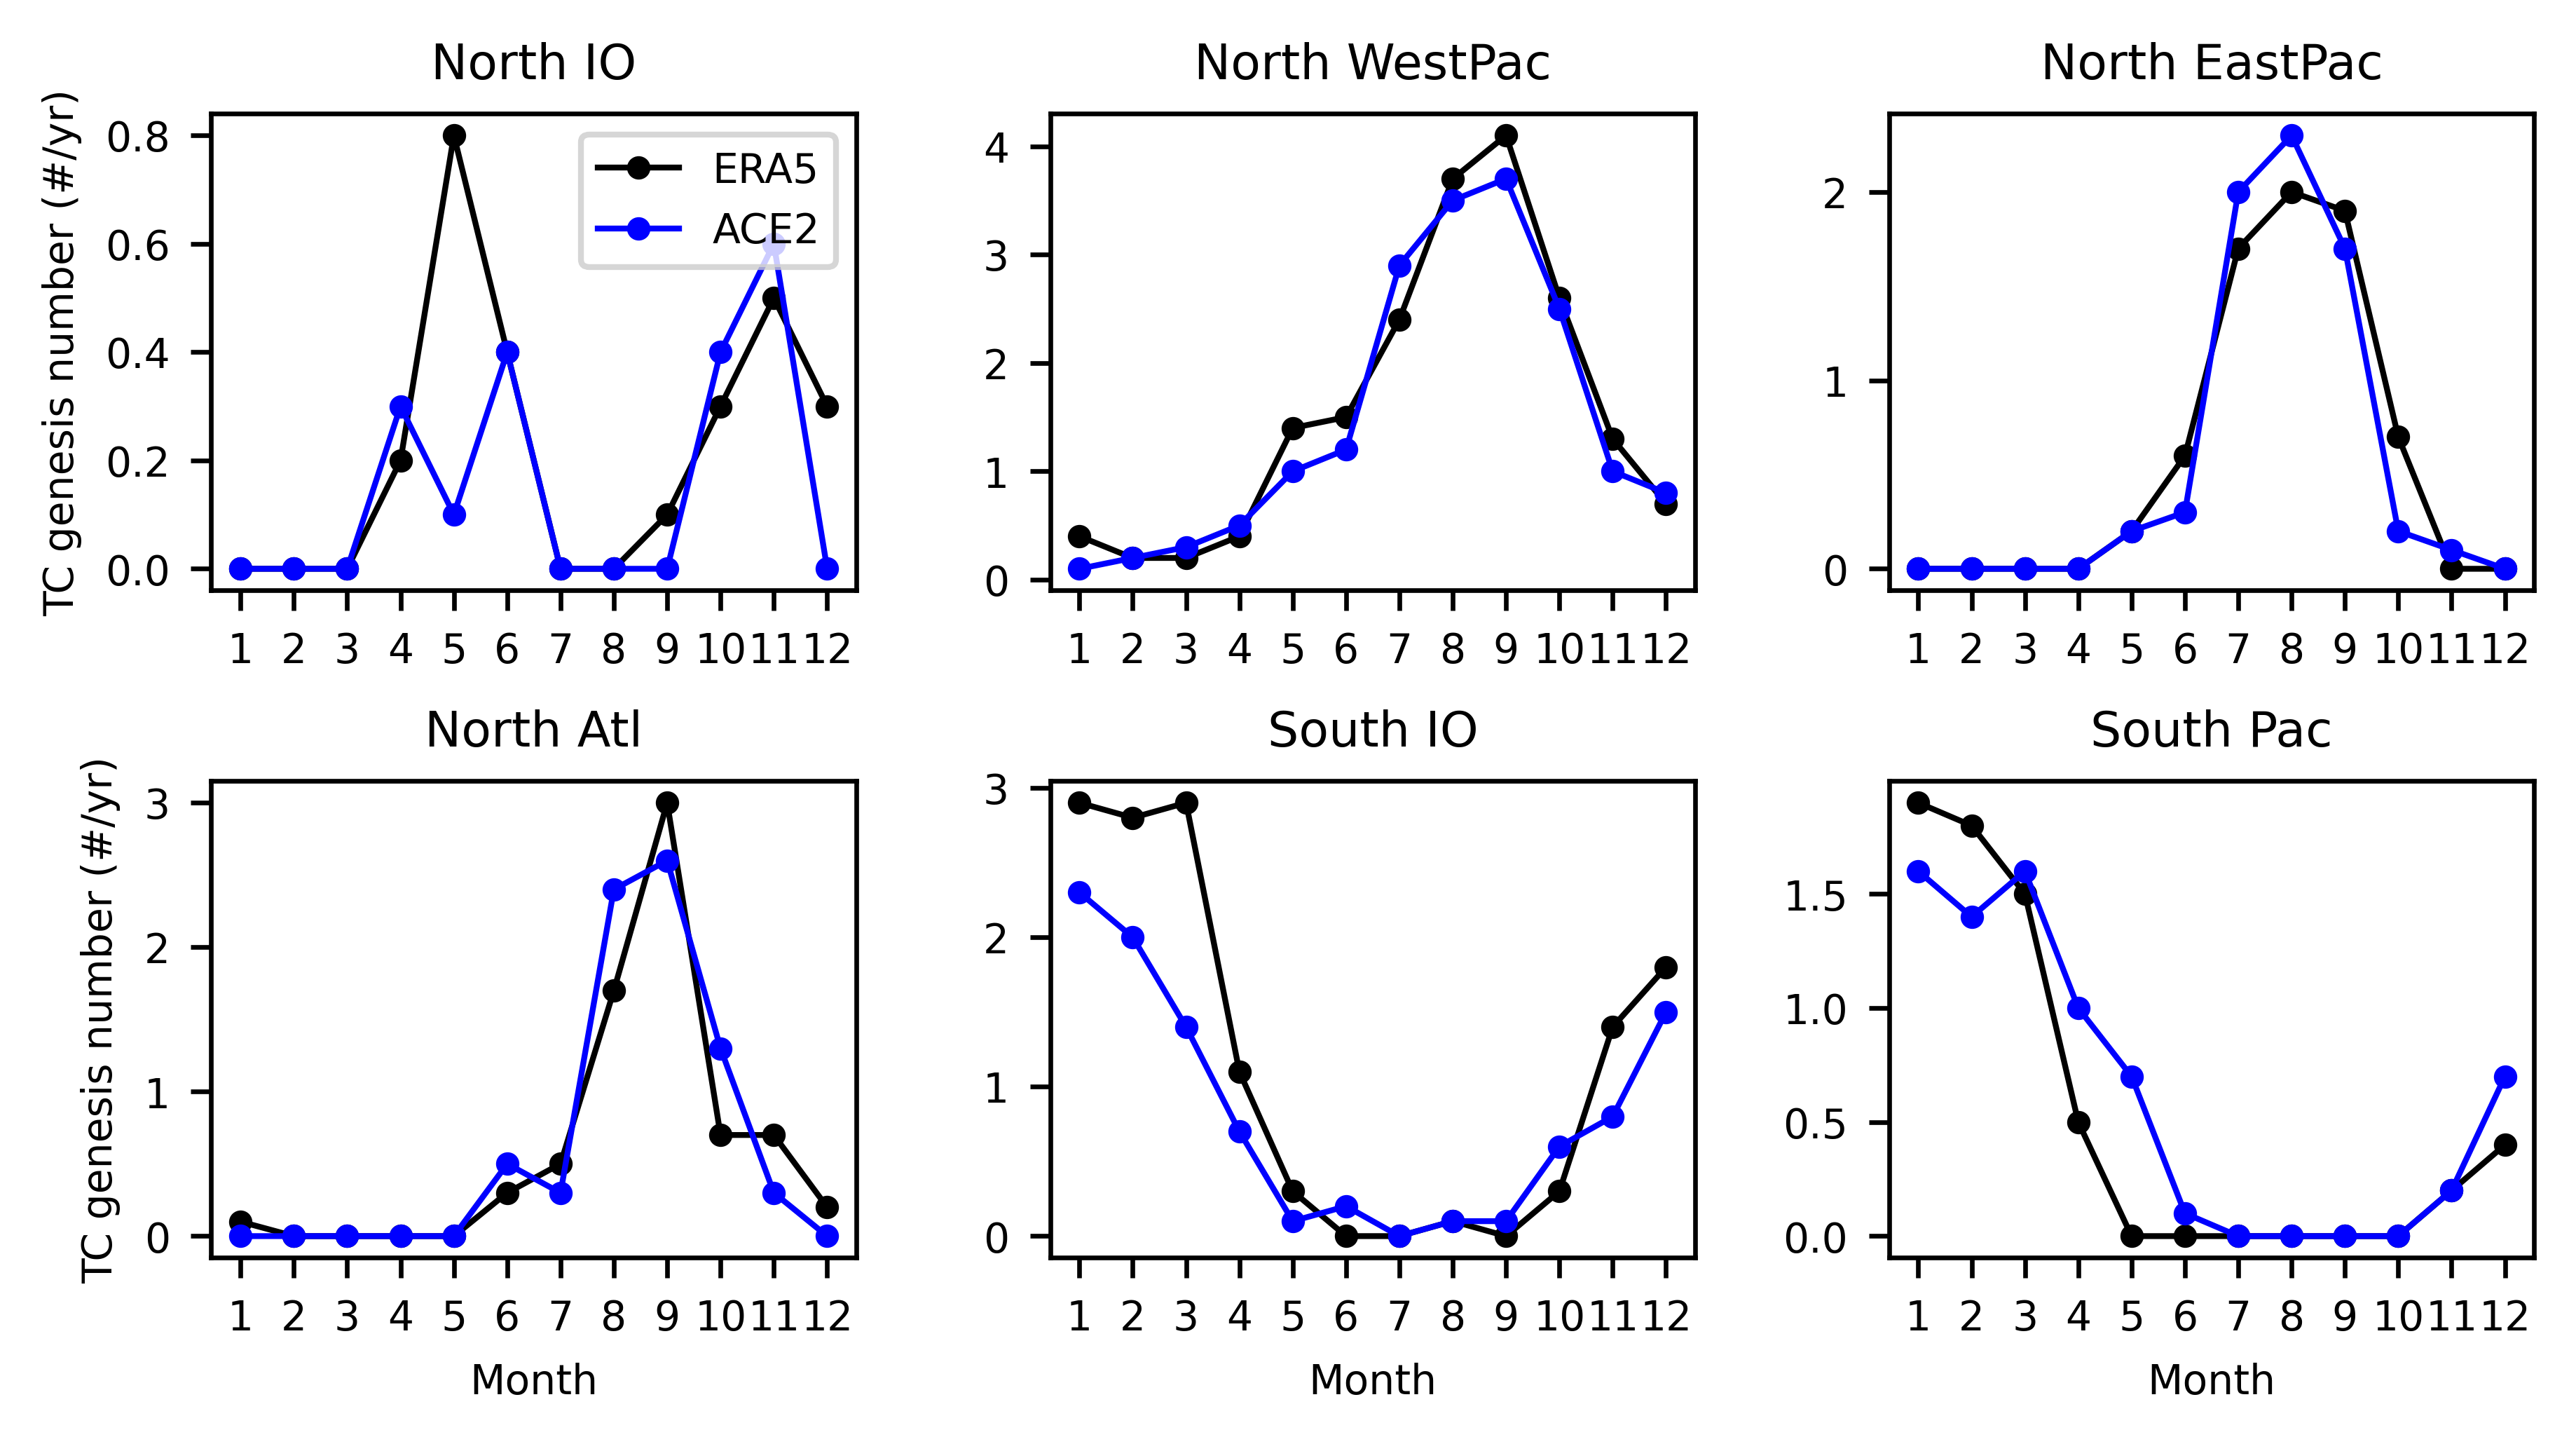

In [28]:
# Plot TC genesis number per month for each basin
mon_xtick = np.arange(1, 13)

fig_name = 'Fig.2.TC_genesis_mon_basin.png'
fig = plt.subplots(2,3,figsize=(6.5, 4),dpi=600)
plt.rcParams.update({'font.size': 7})
plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.4)

for ibasin in range(0, nbasin):
    plt.subplot(2, 3, ibasin+1)
    plt.plot(mon, TC_genesis_mon_basin_era5[:, ibasin]/nyr, 'k-o', linewidth=1, markersize=3)
    plt.plot(mon, TC_genesis_mon_basin_ace2[:, ibasin]/nyr, 'b-o', linewidth=1, markersize=3)
    plt.title(basin_long_list[ibasin])
    plt.xticks(mon_xtick)

    #if ibasin == 0:
    #    plt.yticks(np.arange(0, 15, 3))
    #elif ibasin == 5:
    #    plt.yticks(np.arange(3, 15, 3))
    
    if ibasin == 0 or ibasin == 3:
        plt.ylabel('TC genesis number (#/yr)')
    
    if ibasin > 2:
        plt.xlabel('Month')

    if ibasin == 0:
        plt.legend(['ERA5','ACE2'])
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()

# Count the TC genesis number for each month for each year for each basin

In [29]:
TC_genesis_mon_yr_basin_ace2 = np.zeros([12, 10, nbasin])
TC_genesis_mon_yr_basin_era5 = np.zeros([12, 10, nbasin])
for iexp in range(0, 2):
    mon_TC = globals()['mon_'+expname[iexp]+'_30SN']
    basin_id = globals()['basin_id_'+expname[iexp]]
    yr_TC    = globals()['yr_'+expname[iexp]+'_30SN']
    
    for i in range(0, np.size(mon_TC)):
        if np.isnan(basin_id[i]) != 1:
            imon     = int(mon_TC[i]-1)
            iyr      = int(yr_TC[i]-2001)
            ibasin  = int(basin_id[i])
            if iexp == 0:
                TC_genesis_mon_yr_basin_ace2[ imon, iyr, ibasin ] = TC_genesis_mon_yr_basin_ace2[ imon, iyr, ibasin ] + 1
            else:
                TC_genesis_mon_yr_basin_era5[ imon, iyr, ibasin ] = TC_genesis_mon_yr_basin_era5[ imon, iyr, ibasin ] + 1

mon = np.arange(1, 13)

In [30]:
# Save data
np.savez(file_dir_multi_yr + 'TC_genesis_number_yr_month_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz', 
         TC_genesis_mon_yr_basin_ace2 = TC_genesis_mon_yr_basin_ace2,\
        TC_genesis_mon_yr_basin_era5 = TC_genesis_mon_yr_basin_era5,\
        basin_list = basin_list, basin_long_list=basin_long_list,\
        basin_lon_min = basin_lon_min, basin_lon_max = basin_lon_max, \
        basin_lat_min = basin_lat_min, basin_lat_max = basin_lat_max,\
        mon = mon, yr = np.arange(2001, 2011) )